# FiveThirtyEight-Style Visuals and Choropleth Maps for U.S. Immigration 

Here, we'll create cool FiveThirtyEight-style subplots using matplotlib and an interactive choropleth map using folium. To do that, we'll work with official UN data on immigration to the United States from 1980 to 2013. If you'd like to explore other countries, you can find the original source data on immigration from around to the world into 45 countries here (https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp). Let's break it down: 

**Part 1**: Cleaning and wrangling, including modifying our columns, setting and resetting our index, adjusting data types using pd.to_numeric, coerce, fillna, and astype, creating a new 'Total' column using sum() and axis
<br>**Part 2**: Area plot of immigration for Top 7 countries (using sort values) - Mexico, Philippines, China, India, Vietnam, Dominican Republic, and South Korea 
<br>**Part 3**: Box and line subplots of immigration for Meixco, China, and India
<br>**Part 4**: Box and line subplots of immigration for Philippines, China, India, Vietnam, and South Korea 
<br>**Part 5**: Choropleth map using folium and geojson file 

Let's dig in. 

## Part 1: Cleaning and Wrangling

In [705]:
# Import relevant libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

!pip install folium
import folium # to create choropleth map

In [660]:
# The code was removed by Watson Studio for sharing.

In [661]:
# Read in data
usa = pd.read_excel(body, sheet_name="USA by Place of birth", skiprows=range(20),skipfooter=2)

In [662]:
# Check first few rows
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 220)
usa.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,1881,1569,2566,3222,2794,2831,2424,2873,3232,3187,2879,2685,2964,2344,1424,1263,1127,830,877,1011,1202,1759,1252,2137,4749,3417,1753,2813,3165,2017,1648,1617,2196
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,11,23,22,32,45,53,62,82,71,78,142,682,1400,1489,1420,4007,4374,4220,3695,4755,4358,3765,3362,3840,5947,7914,5737,5754,5137,4711,3612,3364,3186
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,184,190,201,197,202,183,172,199,230,302,269,407,360,364,650,1059,717,804,789,906,875,1030,759,805,1115,1300,1036,1037,1485,1305,1364,1369,1241
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,0,7,7,0,0,0,1,0,..,..,..,0,..,0,..,..,0,4,11,7,28,26,16,12,15,28,11,14,19,14,D,-,D
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,3,2,1,0,0,1,0,0,4,5,..,..,..,..,0,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


In [663]:
# Check dimensions of dataframe. 
usa.shape

(219, 43)

In [664]:
# Check column headings. Includes immigration data from 1980 to 2013. Notice the year column headings aren't strings. Let's convert them to strings. 
usa.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [665]:
# Remove unnecessary columns 
usa.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

In [666]:
# Make all column labels of type string
usa.columns = list(map(str, usa.columns))

In [667]:
# Check column headings. All column headings are strings. 
usa.columns

Index(['OdName', 'AreaName', 'RegName', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

In [668]:
# Rename columns
usa.rename(columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

In [669]:
# Set the country name as index, important for looking up countries using .loc method
usa.set_index('Country', inplace = True)

In [670]:
# Create list for years that we can use for plotting later on (remember we need to add 1 to the last, hence 2014 not 2013)
years = list(map(str, range(1980, 2014)))

In [671]:
usa.dtypes

Continent    object
Region       object
DevName      object
1980         object
1981         object
1982         object
1983         object
1984         object
1985         object
1986         object
1987         object
1988         object
1989         object
1990         object
1991         object
1992         object
1993         object
1994         object
1995         object
1996         object
1997         object
1998         object
1999         object
2000         object
2001         object
2002         object
2003         object
2004         object
2005         object
2006         object
2007         object
2008         object
2009         object
2010         object
2011         object
2012         object
2013         object
dtype: object

In [672]:
usa.columns

Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013'],
      dtype='object')

In [673]:
# Try changing column values to numeric using pd.to_numeric. Error shows ".." values. Let's convert those to NaN, convert NaN to zeros, and change data type to integer
usa["1980"] = pd.to_numeric(usa["1980"])

ValueError: Unable to parse string ".." at position 9

In [674]:
# For each year column, apply pd.to_numeric, coerce errors to NaN values, replace NaN values with zeroes using fillna(0), and change data type to integer
usa["1980"] = pd.to_numeric(usa["1980"], errors="coerce").fillna(0).astype(int)
usa["1981"] = pd.to_numeric(usa["1981"], errors="coerce").fillna(0).astype(int)
usa["1982"] = pd.to_numeric(usa["1982"], errors="coerce").fillna(0).astype(int)
usa["1983"] = pd.to_numeric(usa["1983"], errors="coerce").fillna(0).astype(int)
usa["1984"] = pd.to_numeric(usa["1984"], errors="coerce").fillna(0).astype(int)
usa["1985"] = pd.to_numeric(usa["1985"], errors="coerce").fillna(0).astype(int)
usa["1986"] = pd.to_numeric(usa["1986"], errors="coerce").fillna(0).astype(int)
usa["1987"] = pd.to_numeric(usa["1987"], errors="coerce").fillna(0).astype(int)
usa["1988"] = pd.to_numeric(usa["1988"], errors="coerce").fillna(0).astype(int)
usa["1989"] = pd.to_numeric(usa["1989"], errors="coerce").fillna(0).astype(int)
usa["1990"] = pd.to_numeric(usa["1990"], errors="coerce").fillna(0).astype(int)
usa["1991"] = pd.to_numeric(usa["1991"], errors="coerce").fillna(0).astype(int)
usa["1992"] = pd.to_numeric(usa["1992"], errors="coerce").fillna(0).astype(int)
usa["1993"] = pd.to_numeric(usa["1993"], errors="coerce").fillna(0).astype(int)
usa["1994"] = pd.to_numeric(usa["1994"], errors="coerce").fillna(0).astype(int)
usa["1995"] = pd.to_numeric(usa["1995"], errors="coerce").fillna(0).astype(int)
usa["1996"] = pd.to_numeric(usa["1996"], errors="coerce").fillna(0).astype(int)
usa["1997"] = pd.to_numeric(usa["1997"], errors="coerce").fillna(0).astype(int)
usa["1998"] = pd.to_numeric(usa["1998"], errors="coerce").fillna(0).astype(int)
usa["1999"] = pd.to_numeric(usa["1999"], errors="coerce").fillna(0).astype(int)
usa["2000"] = pd.to_numeric(usa["2000"], errors="coerce").fillna(0).astype(int)
usa["2001"] = pd.to_numeric(usa["2001"], errors="coerce").fillna(0).astype(int)
usa["2002"] = pd.to_numeric(usa["2002"], errors="coerce").fillna(0).astype(int)
usa["2003"] = pd.to_numeric(usa["2003"], errors="coerce").fillna(0).astype(int)
usa["2004"] = pd.to_numeric(usa["2004"], errors="coerce").fillna(0).astype(int)
usa["2005"] = pd.to_numeric(usa["2005"], errors="coerce").fillna(0).astype(int)
usa["2006"] = pd.to_numeric(usa["2006"], errors="coerce").fillna(0).astype(int)
usa["2007"] = pd.to_numeric(usa["2007"], errors="coerce").fillna(0).astype(int)
usa["2008"] = pd.to_numeric(usa["2008"], errors="coerce").fillna(0).astype(int)
usa["2009"] = pd.to_numeric(usa["2009"], errors="coerce").fillna(0).astype(int)
usa["2010"] = pd.to_numeric(usa["2010"], errors="coerce").fillna(0).astype(int)
usa["2011"] = pd.to_numeric(usa["2011"], errors="coerce").fillna(0).astype(int)
usa["2012"] = pd.to_numeric(usa["2012"], errors="coerce").fillna(0).astype(int)
usa["2013"] = pd.to_numeric(usa["2013"], errors="coerce").fillna(0).astype(int)

In [675]:
# Check data types. We see that the data types for years are now correctly integers 
usa.dtypes

Continent    object
Region       object
DevName      object
1980          int64
1981          int64
1982          int64
1983          int64
1984          int64
1985          int64
1986          int64
1987          int64
1988          int64
1989          int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
dtype: object

In [676]:
# Add total column that sums all immigration for a country
usa['Total'] = usa.sum(axis=1)
usa['Total'].to_frame()

,Total
Country,
Afghanistan,74430
Albania,87380
Algeria,23281
American Samoa,220
Andorra,18
Angola,4430
Anguilla,1385
Antigua and Barbuda,24052
Argentina,116501


## Part 2: Area Plot of Top 7 Countries

In [677]:
# Change index name "Viet Nam" to "Vietnam" and "Republic of Korea" to "South Korea", make sure to use inplace=True
usa.rename(index={"Viet Nam":"Vietnam"},inplace=True)
usa.rename(index={"Republic of Korea":"South Korea"},inplace=True)

In [678]:
# Top 7 origin countries of immigration based on total immigration from 1980 to 2013
usa.sort_values(['Total'], ascending=False, axis=0, inplace=True)
usa_top7 = usa.head(7)
usa_top7

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mexico,Latin America and the Caribbean,Central America,Less developed regions,56680,101268,56106,59079,57557,61077,66533,72351,95039,405172,679068,946167,213802,126561,111398,89932,163556,146833,131353,147402,173493,205560,218822,115585,175411,161445,173749,148640,189989,164920,139120,143446,146406,135028,6078548
Philippines,Asia,South-Eastern Asia,Less developed regions,42316,43772,45102,41546,42768,47978,52558,50060,50697,57034,63756,63596,61022,63457,53535,50984,55868,49102,34416,30943,42343,52919,51040,45250,57846,60746,74606,72596,54030,60029,58173,57011,57327,54446,1798872
China,Asia,Eastern Asia,Less developed regions,27651,25803,27100,25777,23363,24787,25106,25841,28717,32272,31815,33025,38907,65578,53985,35463,41720,41128,36854,32159,45585,56267,61082,40568,55494,69933,87307,76655,80271,64238,70863,87016,81784,71798,1625912
India,Asia,Southern Asia,Less developed regions,22607,21522,21738,25451,24964,26026,26227,27803,26268,31175,30667,45064,36755,40121,34921,34748,44838,38048,36414,30157,41903,70032,70823,50228,70151,84680,61369,65353,63352,57304,69162,69013,66434,68458,1533776
Vietnam,Asia,South-Eastern Asia,Less developed regions,43483,55631,72553,37560,37236,31895,29993,24231,25789,37739,48792,55307,77735,59614,41345,41752,42053,38511,17635,20335,26553,35419,33563,22087,31524,32784,30691,28691,31497,29234,30632,34157,28304,27101,1261426
Dominican Republic,Latin America and the Caribbean,Caribbean,Less developed regions,17245,18220,17451,22058,23147,23787,26175,24858,27189,26723,42195,41405,41969,45420,51189,38512,39599,27047,20355,17811,17465,21195,22515,26159,30506,27503,38068,28024,31879,49414,53870,46109,41566,41311,1067939
South Korea,Asia,Eastern Asia,Less developed regions,32320,32663,31724,33339,33042,35253,35776,35849,34703,34222,32301,26518,19359,18026,16011,16047,18179,14226,14222,12795,15721,20532,20724,12382,19766,26562,24386,22405,26666,25859,22227,22824,20846,23166,830641


In [679]:
# Transpose dataframe since for the plot we want years on the x-axis (not countries)
usa_top7 = usa_top7[years].transpose() 

Let's create an area plot of the top 7 countries based on total immigration from 1980 to 2013. The most prominent feature is the spike in immigration from Mexico to nearly 1 million in the early 1990s due, in large part, to immigration reforms of the late 1980s and early 1990s. There's also been a steady increase in immigration from these top 7 countries from 2003 to 2013. 

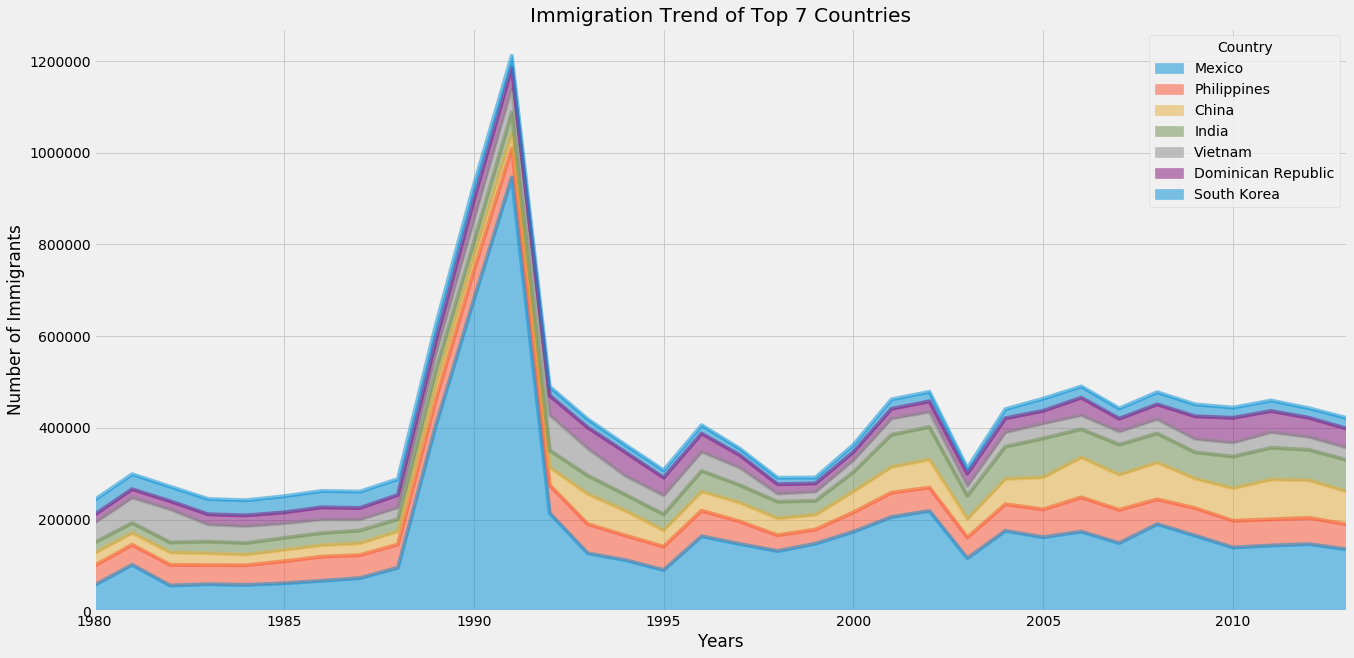

In [702]:
# Call FiveThirtyEight style for plot
mpl.style.use("fivethirtyeight")

# Area plot of Top 7 countries based on total immigration
usa_top7.plot(kind='area', alpha = 0.5, figsize=(20, 10))
plt.title('Immigration Trend of Top 7 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

## Part 3: Box and Line Subplots of Mexico, China, and India

In [681]:
# Dataframe for select countries. Transpose because for the plot later we want years on the x-axis (not countries)
usa_mci= usa.loc[['Mexico','China', 'India'], years].transpose()
usa_mci.describe()

Country,Mexico,China,India
count,34.000000,34.000000,34.000000
mean,178780.823529,47820.941176,45111.058824
std,177078.065068,20897.246988,18790.219037
min,56106.000000,23363.000000,21522.000000
25%,96596.250000,29491.500000,28391.500000
50%,144926.000000,40848.000000,39084.500000
75%,173685.000000,65243.000000,64852.750000
max,946167.000000,87307.000000,84680.000000


Let's create subplots, one a box plot and another a line plot, of immigration from Mexico, China, and India from 1980 to 2013. From our box plot, we see that the spread and median of immigration from Mexico is significantly higher with high-end outliers than those of China and India. The spreads of China and India are similar. Our line plot once again highlights the spike in immigration from Mexico in the early 1990s. 

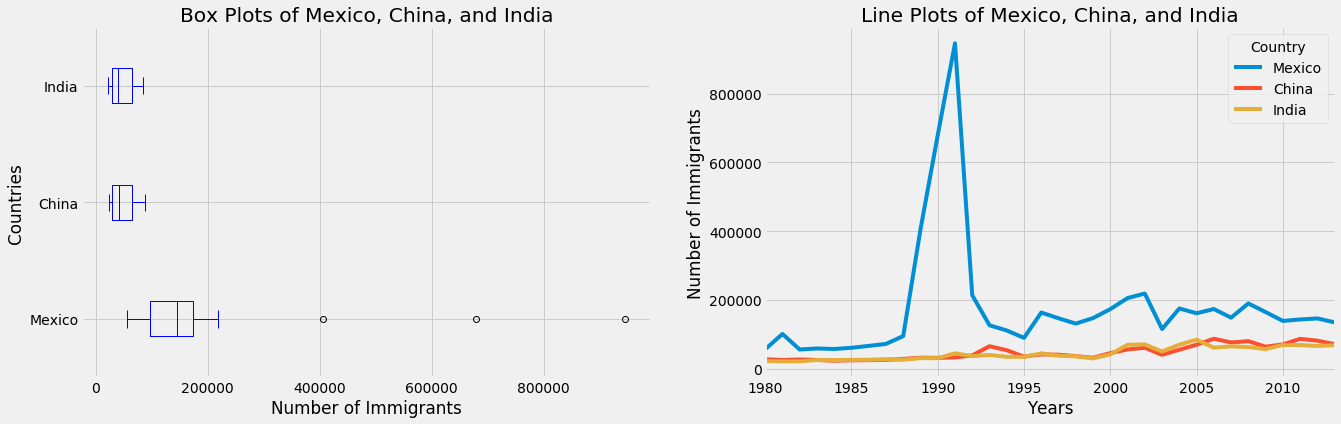

In [703]:
# Plot box plot and line plot of select countries in two subplots 
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
usa_mci.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of Mexico, China, and India')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
usa_mci.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Mexico, China, and India')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

## Part 4: Box and Line Subplots for Philippines, China, India, Vietnam, and South Korea

In [683]:
# Dataframe of select countries. Transpose because for the plot later, we want years on x-axis 
usa_pcivk= usa.loc[['Philippines','China', 'India', 'Vietnam','South Korea'], years].transpose()
usa_pcivk.describe()

Country,Philippines,China,India,Vietnam,South Korea
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,52908.000000,47820.941176,45111.058824,37100.764706,24430.617647
std,9598.219769,20897.246988,18790.219037,13706.719887,7549.167472
min,30943.000000,23363.000000,21522.000000,17635.000000,12382.000000
25%,45932.000000,29491.500000,28391.500000,28826.750000,18474.000000
50%,53227.000000,40848.000000,39084.500000,33173.500000,22995.000000
75%,58091.250000,65243.000000,64852.750000,41650.250000,32315.250000
max,74606.000000,87307.000000,84680.000000,77735.000000,35849.000000


Let's create subplots, one a box plot and another a line plot, of immigration from select Asian countries from 1980 to 2013. From our box plot, Philippines has the highest median annual immigration. The spread of China and India are considerably larger than those of the others. Vietnam has two outliers. We can see them on the right in the line plot with immigration spikes from Vietnam in 1982 and 1992. Our line plot also illustrates a notable rise in immigration from Philippines, China, and India from 1999 to 2013. 

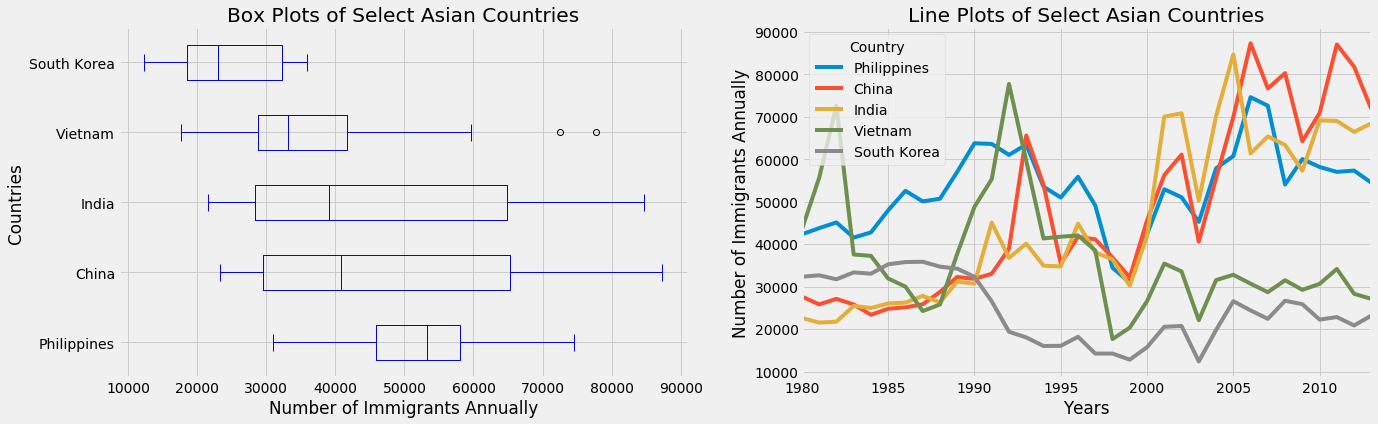

In [704]:
# Plot box plot and line plot of select countries in two subplots 
fig = plt.figure() 

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: Box plot
usa_pcivk.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) 
ax0.set_title('Box Plots of Select Asian Countries')
ax0.set_xlabel('Number of Immigrants Annually')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
usa_pcivk.plot(kind='line', figsize=(20, 6), ax=ax1) 
ax1.set_title ('Line Plots of Select Asian Countries')
ax1.set_ylabel('Number of Immigrants Annually')
ax1.set_xlabel('Years')

plt.show()

## Part 5: Choropleth Map of Immigration to the U.S. 

In [685]:
# Download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
world_geo = r'world_countries.json' # geojson file

In [686]:
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map

In [687]:
# Change select country names so they match the property name in the geojson file, make sure to use inplace=True
usa.rename(index={"Russian Federation":"Russia"},inplace=True)
usa.rename(index={"Bolivia (Plurinational State of)":"Bolivia"},inplace=True)
usa.rename(index={"Venezuela (Bolivarian Republic of)":"Venezuela"},inplace=True)
usa.rename(index={"Côte d'Ivoire":"Ivory Coast"},inplace=True)
usa.rename(index={"United Kingdom of Great Britain and Northern Ireland":"United Kingdom"},inplace=True)
usa.rename(index={"Iran (Islamic Republic of)":"Iran"},inplace=True)
usa.rename(index={"Syrian Arab Republic":"Syria"},inplace=True)
usa.rename(index={"The former Yugoslav Republic of Macedonia":"Macedonia"},inplace=True)
usa.rename(index={"Republic of Moldova":"Moldova"},inplace=True)
usa.rename(index={"Lao People's Democratic Republic":"Laos"},inplace=True)
usa.rename(index={"Serbia":"Republic of Serbia"},inplace=True)

In [688]:
# Check the first few rows again. As we'll need "Country" as a column for our plot later, let's reset the index (recall we set country to index earlier)
usa.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mexico,Latin America and the Caribbean,Central America,Less developed regions,56680,101268,56106,59079,57557,61077,66533,72351,95039,405172,679068,946167,213802,126561,111398,89932,163556,146833,131353,147402,173493,205560,218822,115585,175411,161445,173749,148640,189989,164920,139120,143446,146406,135028,6078548
Philippines,Asia,South-Eastern Asia,Less developed regions,42316,43772,45102,41546,42768,47978,52558,50060,50697,57034,63756,63596,61022,63457,53535,50984,55868,49102,34416,30943,42343,52919,51040,45250,57846,60746,74606,72596,54030,60029,58173,57011,57327,54446,1798872
China,Asia,Eastern Asia,Less developed regions,27651,25803,27100,25777,23363,24787,25106,25841,28717,32272,31815,33025,38907,65578,53985,35463,41720,41128,36854,32159,45585,56267,61082,40568,55494,69933,87307,76655,80271,64238,70863,87016,81784,71798,1625912
India,Asia,Southern Asia,Less developed regions,22607,21522,21738,25451,24964,26026,26227,27803,26268,31175,30667,45064,36755,40121,34921,34748,44838,38048,36414,30157,41903,70032,70823,50228,70151,84680,61369,65353,63352,57304,69162,69013,66434,68458,1533776
Vietnam,Asia,South-Eastern Asia,Less developed regions,43483,55631,72553,37560,37236,31895,29993,24231,25789,37739,48792,55307,77735,59614,41345,41752,42053,38511,17635,20335,26553,35419,33563,22087,31524,32784,30691,28691,31497,29234,30632,34157,28304,27101,1261426


In [689]:
# Reset index to original
usa = usa.reset_index()

In [690]:
# Check the column headings, we see that we have "Country" back
usa.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [699]:
# Call the geojson file
world_geo = r'world_countries.json'

# Customize scale to be used for colors, called in threshold_scale parameter below
myscale = (usa['Total'].quantile((0,0.1,0.3,0.6,0.9, 1))).tolist()

# Plot choropleth on world map using our geojson
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(
    geo_data=world_geo,
    data=usa,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=myscale,
    fill_color='GnBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to the United States',
    reset=True
)

world_map